In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import online data
from sklearn.datasets import load_digits

In [2]:
# Load data
digits = load_digits()

In [11]:
# Features (X)
X = digits.data
digits.data.shape # 1797 pictures of size 64 == 8x8

(1797, 64)

In [16]:
# Image at first index
X[0] 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
# Labels (y)
y = digits.target
digits.target.shape

(1797,)

In [17]:
# First index image label
y[0]

0

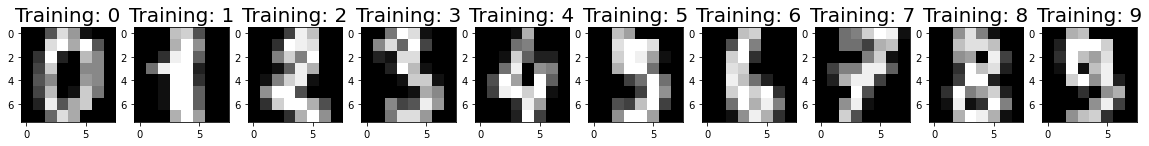

In [10]:
# Plot first 10 digits images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize=20)

In [18]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [20]:
print(f'Train input: {X_train.shape}')
print(f'Train labels: {y_train.shape}')
print(f'Test input: {X_test.shape}')
print(f'Test labels: {y_test.shape}')

Train input: (1437, 64)
Train labels: (1437,)
Test input: (360, 64)
Test labels: (360,)


In [21]:
# Train model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
log_reg

c:\users\awon\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Make predictions on first 10 test images
log_reg.predict(X_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [23]:
# Make predictions on all test images
y_pred = log_reg.predict(X_test)
y_pred[:10] # same labels predicted as above

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
y_test.ndim, y_pred.ndim

(1, 1)

In [37]:
# Accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc_score}')

Accuracy score: 0.9666666666666667


In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

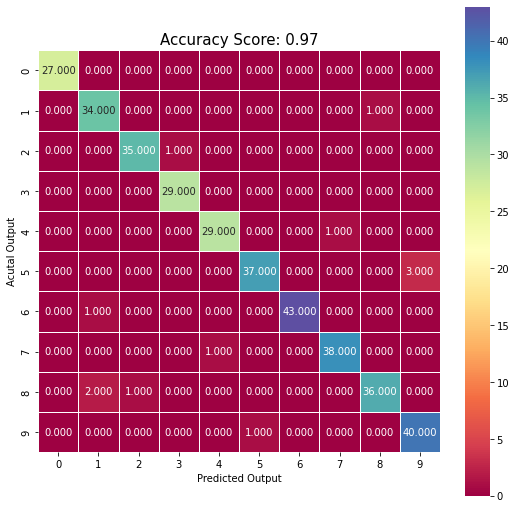

In [41]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5,
            square=True, cmap='Spectral')

plt.xlabel('Predicted Output')
plt.ylabel('Acutal Output')
plt.title(f'Accuracy Score: {acc_score:.2f}', size=15);

In [47]:
# Get misclassified index labels
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict:
        misclassifiedIndexes.append(index)
    index += 1

In [48]:
# View misclassified index labels
misclassifiedIndexes

[56, 84, 94, 118, 124, 130, 181, 196, 235, 315, 331, 335]

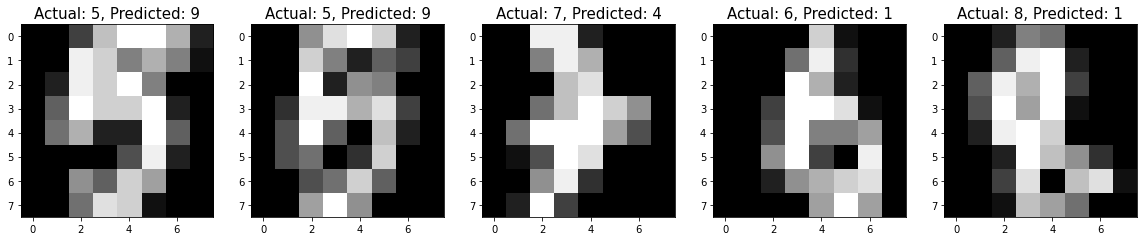

In [52]:
# Plot misclassified index labels with known labels (y_test)
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]): # first 5 labels
    plt.subplot(1, 5, plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title(f'Actual: {y_test[badIndex]}, Predicted: {y_pred[badIndex]}', fontsize=15)